In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("AQI.csv")

In [3]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,SO2,20.0,23.0,21.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,OZONE,17.0,35.0,22.0
2,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",19-05-2025 10:00:00,17.720000,83.300000,PM10,23.0,66.0,36.0
3,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,NO2,4.0,5.0,5.0
4,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,CO,10.0,19.0,12.0


In [4]:
df.tail()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
3072,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",19-05-2025 10:00:00,22.511060,88.351420,PM2.5,13.0,23.0,16.0
3073,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",19-05-2025 10:00:00,22.511060,88.351420,NH3,4.0,6.0,4.0
3074,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",19-05-2025 10:00:00,22.511060,88.351420,OZONE,13.0,50.0,20.0
3075,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",19-05-2025 10:00:00,22.544808,88.340369,NH3,5.0,5.0,5.0
3076,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",19-05-2025 10:00:00,26.687923,88.415250,PM2.5,27.0,46.0,36.0


In [5]:
df.shape

(3077, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3077 non-null   object 
 1   state          3077 non-null   object 
 2   city           3077 non-null   object 
 3   station        3077 non-null   object 
 4   last_update    3077 non-null   object 
 5   latitude       3077 non-null   float64
 6   longitude      3077 non-null   float64
 7   pollutant_id   3077 non-null   object 
 8   pollutant_min  2778 non-null   float64
 9   pollutant_max  2778 non-null   float64
 10  pollutant_avg  2778 non-null   float64
dtypes: float64(5), object(6)
memory usage: 264.6+ KB


In [7]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3077.000000,3077.000000,2778.000000,2778.000000,2778.000000
mean,22.250067,78.682006,21.670986,59.251620,33.933765
std,5.519664,4.854371,25.535470,65.896529,36.125555
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.036458,75.521300,5.000000,15.000000,9.000000
50%,23.023389,77.508730,13.000000,40.000000,23.000000
75%,26.833997,80.723178,29.000000,79.000000,45.000000
max,34.066206,94.636574,303.000000,500.000000,336.000000


In [8]:
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    299
pollutant_max    299
pollutant_avg    299
dtype: int64

In [9]:
#handlling missing values 
df['pollutant_avg'] = df.groupby('pollutant_id')['pollutant_avg'].transform(lambda x: x.fillna(x.mean()))
df['pollutant_min'] = df.groupby('pollutant_id')['pollutant_min'].transform(lambda x: x.fillna(x.mean()))
df['pollutant_max'] = df.groupby('pollutant_id')['pollutant_max'].transform(lambda x: x.fillna(x.mean()))


In [10]:
df.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [11]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

In [14]:
#What are the most frequently monitored pollutants (pollutant_id)?
df['pollutant_id'].value_counts().sort_values(ascending=False)

pollutant_id
PM2.5    456
PM10     454
NO2      449
CO       442
SO2      438
OZONE    432
NH3      406
Name: count, dtype: int64

In [17]:
#How many unique cities and states are represented in the dataset?
df['city'].nunique()

237

In [20]:
#Which pollutant has the highest overall average (pollutant_avg) across all cities?
df.groupby('pollutant_id')['pollutant_avg'].mean().sort_values(ascending=False)

pollutant_id
PM10     77.762755
PM2.5    57.167939
CO       31.198113
OZONE    25.868735
NO2      23.821340
SO2      14.671795
NH3       5.403361
Name: pollutant_avg, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_3180\618689983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='pollutant_id',y='pollutant_avg',palette='pastel')


Text(0.5, 1.0, 'pollutant_id by their avg pollution')

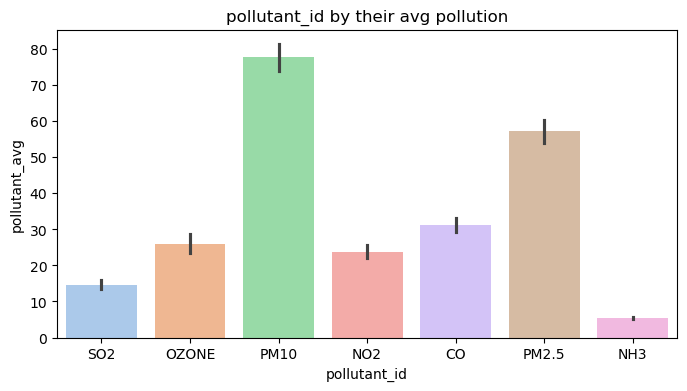

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='pollutant_id',y='pollutant_avg',palette='pastel')
plt.title('pollutant_id by their avg pollution')


In [38]:
#What are the top 5 cities with the highest average pollution levels (pollutant_avg)?
top_5=df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False).head(5)
print(top_5)

city
Baddi               80.714286
Gurugram            72.952551
Jalandhar           67.857143
Delhi               67.499105
Mandi Gobindgarh    63.285714
Name: pollutant_avg, dtype: float64


# Finding Patterns 

In [40]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,SO2,20.0,23.0,21.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,OZONE,17.0,35.0,22.0
2,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",19-05-2025 10:00:00,17.720000,83.300000,PM10,23.0,66.0,36.0
3,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,NO2,4.0,5.0,5.0
4,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,CO,10.0,19.0,12.0


In [43]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

In [49]:
#Which states have the highest and lowest average AQI levels?
state_avg_aqi=df.groupby('state')['pollutant_avg'].mean()

highest_state=state_avg_aqi.idxmax()
highest_value=state_avg_aqi.max()

lowest_state=state_avg_aqi.idxmin()
lowest_value=state_avg_aqi.min()

print(f" Highest average AQI: {highest_state} ({highest_value:.2f})")
print(f" Lowest average AQI: {lowest_state} ({lowest_value:.2f})")


 Highest average AQI: Himachal Pradesh (80.71)
 Lowest average AQI: Andaman and Nicobar (16.91)


In [51]:
#Are certain pollutants more common in specific states or regions?
pollution_distribution=df.groupby(['state','pollutant_id']).size().unstack(fill_value=0)
print(pollution_distribution)

pollutant_id         CO  NH3  NO2  OZONE  PM10  PM2.5  SO2
state                                                     
Andaman and Nicobar   1    1    1      1     1      1    1
Andhra_Pradesh       12   12   12     12    12     12   12
Arunachal_Pradesh     1    0    1      1     1      1    1
Assam                 7    6    6      7     7      7    7
Bihar                28   28   30     31    28     30   28
Chandigarh            2    2    2      2     2      2    2
Chhattisgarh         13   11   12     12    13     13   13
Delhi                38   31   39     38    39     39   32
Gujarat              13   12   15     14    15     14   15
Haryana               2    1    2      2     2      2    1
Himachal Pradesh      1    1    1      1     1      1    1
Jammu_and_Kashmir     1    0    0      0     1      1    0
Jharkhand             1    0    1      1     0      1    1
Karnataka            29   25   28     26    29     27   28
Kerala                5    4    5      5     5      5   

In [52]:
most_common_pollutant = df.groupby('state')['pollutant_id'].agg(lambda x: x.value_counts().idxmax())
print(most_common_pollutant)

state
Andaman and Nicobar    OZONE
Andhra_Pradesh           SO2
Arunachal_Pradesh        NO2
Assam                   PM10
Bihar                  OZONE
Chandigarh                CO
Chhattisgarh             SO2
Delhi                    NO2
Gujarat                  NO2
Haryana                 PM10
Himachal Pradesh        PM10
Jammu_and_Kashmir         CO
Jharkhand                SO2
Karnataka                 CO
Kerala                 PM2.5
Madhya Pradesh          PM10
Maharashtra            PM2.5
Manipur                  SO2
Meghalaya              PM2.5
Mizoram                OZONE
Odisha                  PM10
Punjab                 PM2.5
Rajasthan                NO2
Sikkim                  PM10
TamilNadu              PM2.5
Telangana                NO2
Tripura                   CO
Uttar_Pradesh          PM2.5
Uttarakhand            PM2.5
West_Bengal              SO2
Name: pollutant_id, dtype: object


In [54]:
#What’s the difference between pollutant_max and pollutant_min — which cities have the largest spread?
df['spread']=df['pollutant_max']-df['pollutant_min']
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,spread
0,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,SO2,20.0,23.0,21.0,3.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,OZONE,17.0,35.0,22.0,18.0
2,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",19-05-2025 10:00:00,17.720000,83.300000,PM10,23.0,66.0,36.0,43.0
3,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,NO2,4.0,5.0,5.0,1.0
4,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,CO,10.0,19.0,12.0,9.0


In [66]:
df.groupby('city')['spread'].max().sort_values(ascending=False).head()

city
Bengaluru    498.0
Jhalawar     485.0
Gorakhpur    474.0
Mumbai       450.0
Howrah       382.0
Name: spread, dtype: float64

In [71]:
#Which top 5 cities or stations report multiple pollutants? Can we detect hotspots?
df.groupby(['city','station'])['pollutant_id'].count().sort_values(ascending=False).head()

city        station                                  
Ulhasnagar  Sidhi Vinayak Nagar, Ulhasnagar - MPCB       7
Udaipur     Ashok Nagar, Udaipur - RSPCB                 7
Tumidih     OP Jindal Industrial Park, Tumidih - CECB    7
Tonk        Shastri Nagar, Tonk - RSPCB                  7
Tirupati    Vaikuntapuram, Tirupati - APPCB              7
Name: pollutant_id, dtype: int64

In [72]:
#How do average pollution levels vary by pollutant type?
df.groupby('pollutant_id')['pollutant_avg'].mean().sort_values(ascending=False)

pollutant_id
PM10     77.762755
PM2.5    57.167939
CO       31.198113
OZONE    25.868735
NO2      23.821340
SO2      14.671795
NH3       5.403361
Name: pollutant_avg, dtype: float64

In [79]:
#Which cities consistently show high levels of hazardous pollutants (e.g., PM10, NO2)?
hazardous_pollutants = ['PM10', 'NO2']
haz_df = df[df['pollutant_id'].isin(hazardous_pollutants)]

In [81]:
city_pollutant_avg=haz_df.groupby(['city','pollutant_id'])['pollutant_avg'].mean().unstack()
print(city_pollutant_avg)

pollutant_id         NO2       PM10
city                               
Agartala       23.821340        NaN
Agra           26.333333  97.833333
Ahmedabad      37.777778  72.640306
Ahmednagar     28.000000  77.762755
Aizawl               NaN  77.762755
...                  ...        ...
Virar          17.000000  59.000000
Virudhunagar   23.821340  77.762755
Visakhapatnam  15.000000  36.000000
Vrindavan      12.000000  60.000000
Yadgir         23.821340  77.762755

[237 rows x 2 columns]


In [83]:
high_pollution_cities = city_pollutant_avg[(city_pollutant_avg['PM10'] > 100) & (city_pollutant_avg['NO2'] > 50)]
print(high_pollution_cities)

pollutant_id   NO2   PM10
city                     
Badlapur      51.0  105.0


In [96]:
#Which state has the most polluted cities? Can you suggest specific cities for intervention?
most_polluted_city=df.groupby(['city','state'])['pollutant_avg'].mean().sort_values(ascending=False).head()
print(most_polluted_city)

city              state           
Baddi             Himachal Pradesh    80.714286
Gurugram          Haryana             72.952551
Jalandhar         Punjab              67.857143
Delhi             Delhi               67.499105
Mandi Gobindgarh  Punjab              63.285714
Name: pollutant_avg, dtype: float64


In [99]:
#If we prioritize the top 10 most polluted stations, which should be targeted first for air quality improvement projects?
top10_station =df.groupby('station')['pollutant_avg'].mean().sort_values(ascending=False).head(10)
print(top10_station)

station
CRRI Mathura Road, Delhi - IMD           136.600000
Aya Nagar, Delhi - IMD                   106.400000
Lodhi Road, Delhi - IITM                  97.000000
IGI Airport (T3), Delhi - IMD             93.150407
Sector - 62, Noida - IMD                  87.200000
Wazirpur, Delhi - DPCC                    81.857143
HIMUDA Complex Phase-1, Baddi - HPPCB     80.714286
Lodhi Road, Delhi - IMD                   79.800000
Shadipur, Delhi - CPCB                    78.428571
Jahangirpuri, Delhi - DPCC                75.857143
Name: pollutant_avg, dtype: float64


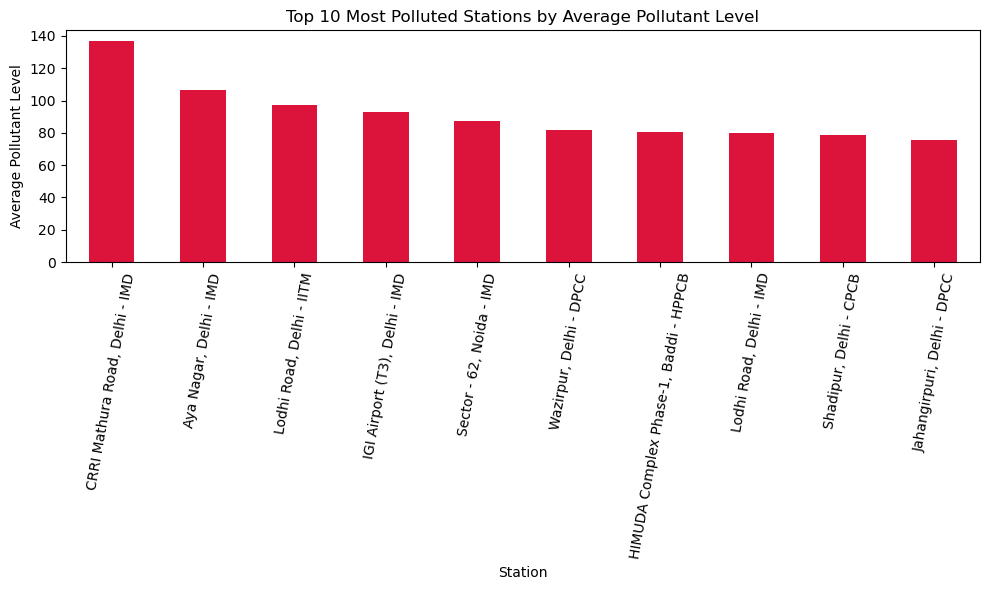

In [112]:
import matplotlib.pyplot as plt

# Plot
top10_station.plot(kind='bar', figsize=(10,6), color='crimson')

# Title and labels
plt.title('Top 10 Most Polluted Stations by Average Pollutant Level')
plt.xlabel('Station')
plt.ylabel('Average Pollutant Level')
plt.xticks(rotation=80)


plt.tight_layout()
plt.show()



In [121]:
#Can you cluster cities into low, medium, and high pollution zones using pollutant averages?
def categorize_pollution(value):
    if value <= 100:
        return 'Low'
    elif value <= 200:
        return 'Medium'
    else:
        return 'High'

df['pollution_zone']=df['pollutant_avg'].apply(categorize_pollution)

In [119]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,spread,pollution_zone
0,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,SO2,20.0,23.0,21.0,3.0,Low
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,OZONE,17.0,35.0,22.0,18.0,Low
2,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",19-05-2025 10:00:00,17.720000,83.300000,PM10,23.0,66.0,36.0,43.0,Low
3,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,NO2,4.0,5.0,5.0,1.0,Low
4,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,CO,10.0,19.0,12.0,9.0,Low


In [122]:
df['pollution_zone'].value_counts()

pollution_zone
Low       2909
Medium     158
High        10
Name: count, dtype: int64

In [128]:
df[df['pollution_zone']=='High'][['state','city','station']]

,state,city,station
164,Delhi,Delhi,"Patparganj, Delhi - DPCC"
361,Maharashtra,Mumbai,"Vile Parle West, Mumbai - MPCB"
735,Delhi,Delhi,"IGI Airport (T3), Delhi - IMD"
738,Delhi,Delhi,"Jahangirpuri, Delhi - DPCC"
778,Delhi,Delhi,"Lodhi Road, Delhi - IITM"
1934,Delhi,Delhi,"Jahangirpuri, Delhi - DPCC"
1949,Delhi,Delhi,"CRRI Mathura Road, Delhi - IMD"
1989,Delhi,Delhi,"Wazirpur, Delhi - DPCC"
2593,Delhi,Delhi,"Mundka, Delhi - DPCC"
2595,Delhi,Delhi,"NSIT Dwarka, Delhi - CPCB"


In [140]:
#Which pollutant(s) should be the focus of state-level environmental policy based on their spread and average intensity?
df.groupby('pollutant_id')['spread'].mean().sort_values(ascending=False)

pollutant_id
PM10     69.012755
PM2.5    68.951654
OZONE    50.985680
CO       31.492925
NO2      23.965261
SO2      11.805128
NH3       3.557423
Name: spread, dtype: float64

PM10,PM2.5,OZONE should be focus more for state level environmental policy 